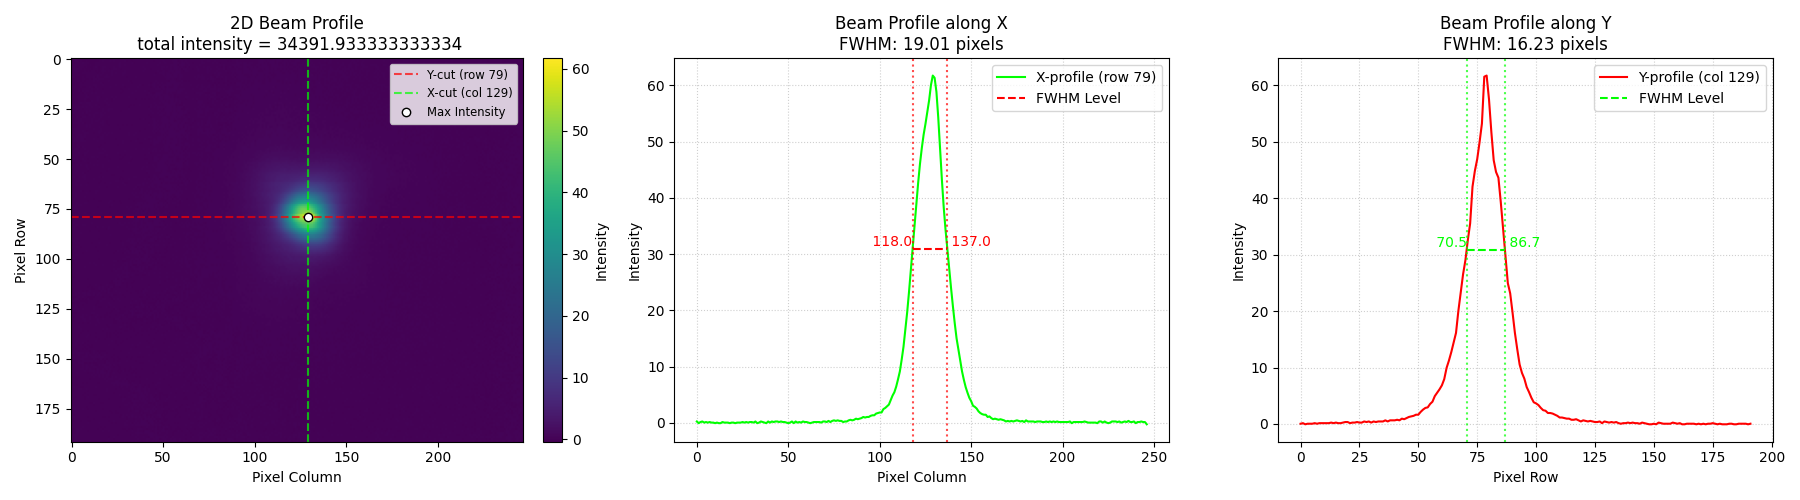

In [5]:
%matplotlib widget
from Code_utilities.BeamAnalysis import BeamAnalysis
from Code_utilities.BeamCharacteristicsExtractor import BeamCharacteristicsExtractor
import numpy as np

dir_path_HIKMICRO = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/SpectralResponseComparison/HIKMICRO'
filename = 'LP 3 THz.csv'
x_center_HIKMICRO = 139 - 5
y_center_HIKMICRO = 107
width = 250
crop_x_range_HIKMICRO = (x_center_HIKMICRO - width / 2, x_center_HIKMICRO + width / 2)
crop_y_range_HIKMICRO = (y_center_HIKMICRO - width / 2, y_center_HIKMICRO + width / 2)
beam_analysis_HIKMICRO = BeamAnalysis(dir_path=dir_path_HIKMICRO,
                                      signal_filename=filename,
                                      camera_name='HIKMICRO',
                                      crop_range_x_pixels=crop_x_range_HIKMICRO,
                                      crop_range_y_pixels=crop_y_range_HIKMICRO)
HIKMICRO_map_array = beam_analysis_HIKMICRO.map_array
fhwm_extractor_HIKMICRO = BeamCharacteristicsExtractor(map_array=HIKMICRO_map_array,
                                                       camera_name='HIKMICRO',
                                                       Y_ref_position_for_background_subtraction=3)
fig_fwhm_extractor_HIKMICRO, axs_fwhm_extractor_HIKMICRO = fhwm_extractor_HIKMICRO.plot_analysis()
fig_fwhm_extractor_HIKMICRO.set_size_inches(12,
                                            5)
HIKMICRO_bg_subtracted_map_array = fhwm_extractor_HIKMICRO.map_array / np.max(fhwm_extractor_HIKMICRO.map_array)

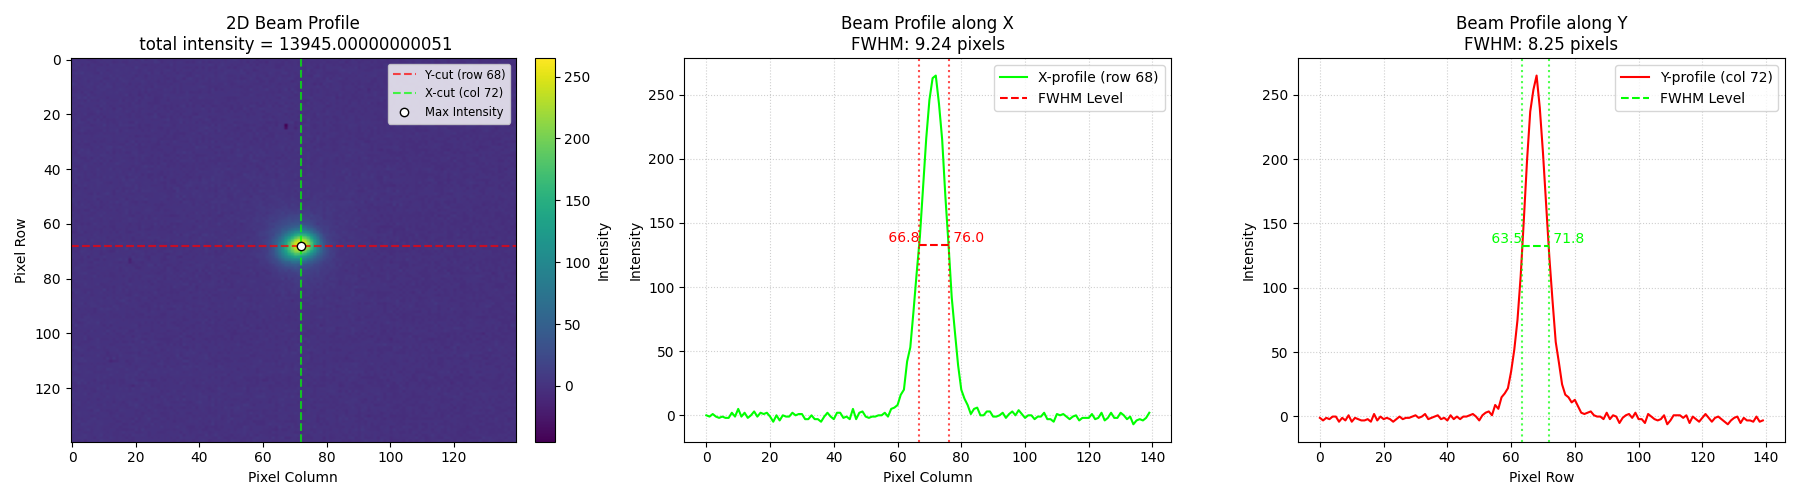

In [6]:
from Code_utilities.BeamAnalysis import BeamAnalysis
from Code_utilities.BeamCharacteristicsExtractor import BeamCharacteristicsExtractor
import numpy as np

%matplotlib widget
# dir_path_NEC = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250603/NEC_PositionSeries/all_measurements'
# filename = '1,55 mm.csv'
dir_path_NEC = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/SpectralResponseComparison/NEC'
filename = 'LP 3 THz.csv'
x_center_NEC = 110+15
y_center_NEC = 202
width = 140
crop_x_range_NEC = (x_center_NEC - width / 2, x_center_NEC + width / 2)
crop_y_range_NEC = (y_center_NEC - width / 2, y_center_NEC + width / 2)
beam_analysis_NEC = BeamAnalysis(dir_path=dir_path_NEC,
                                 signal_filename=filename,
                                 camera_name='NEC',
                                 crop_range_x_pixels=crop_x_range_NEC,
                                 crop_range_y_pixels=crop_y_range_NEC)

Y_ref_position_for_background_subtraction_NEC = 2
map_array_NEC = beam_analysis_NEC.map_array
fhwm_extractor_NEC = BeamCharacteristicsExtractor(map_array=map_array_NEC,
                                                  camera_name='NEC',
                                                  Y_ref_position_for_background_subtraction=Y_ref_position_for_background_subtraction_NEC)
fig_fwhm_extractor_NEC, axs_fwhm_extractor_NEC = fhwm_extractor_NEC.plot_analysis()
fig_fwhm_extractor_NEC.set_size_inches(12,
                                       5)
NEC_bg_subtracted_map_array = fhwm_extractor_NEC.map_array / np.max(fhwm_extractor_NEC.map_array)


      FWHM Analysis Results
Beam 1 (HIKMICRO):
  - X-Profile FWHM: 247.09 µm
  - Y-Profile FWHM: 210.93 µm

Beam 2 (NEC):
  - X-Profile FWHM: 217.20 µm
  - Y-Profile FWHM: 193.92 µm

Plot saved to Beam_Comparison.pdf


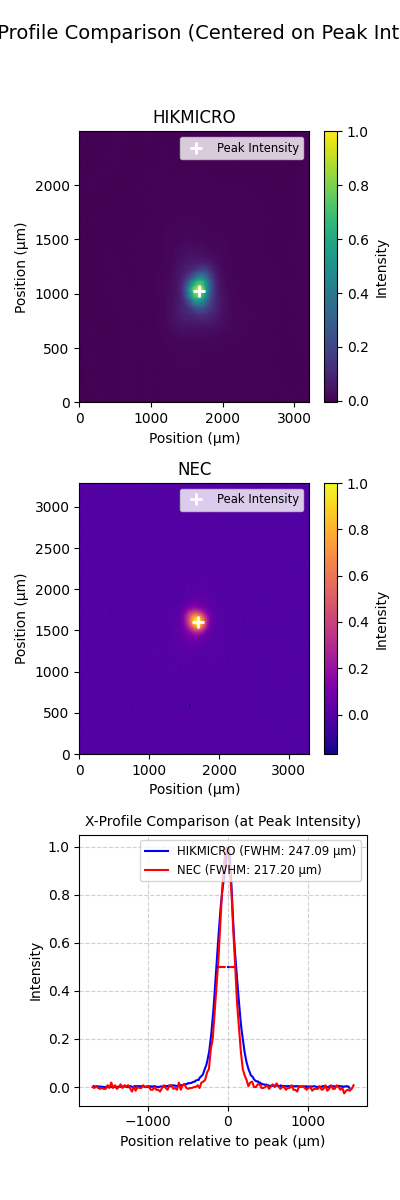

In [8]:
%matplotlib widget
from ManuscriptAnalysis.Spectral_Analysis.NewAnalysis_w_DoubleFilters.SideBySideComparison.FunctionsBeamComparison import plot_beam_comparison

x_shift_beam_1 = -2
y_shift_beam_1 = +5
fig, axs = plot_beam_comparison(beam1_data=HIKMICRO_bg_subtracted_map_array,
                                beam2_data=NEC_bg_subtracted_map_array,
                                pixel_size1=beam_analysis_HIKMICRO.pixel_size_um,
                                pixel_size2=beam_analysis_NEC.pixel_size_um,
                                x_shift_beam_1=x_shift_beam_1,
                                y_shift_beam_1=y_shift_beam_1,
                                label_1='HIKMICRO',
                                label_2='NEC',
                                filename='Beam_Comparison.pdf',
                                save_plot=True,
                                show_plot=True)
fig.suptitle(filename)
fig.savefig('Beam_Comparison 3 THz.png',
            dpi=900)
fig.savefig('Beam_Comparison 3 THz.pdf',)